In [1]:
import os
import pandas as pd
import requests
import xlrd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import datetime, date, timedelta

In [2]:
total_cases = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
total_cases = pd.read_csv(total_cases)
total_cases.to_csv('data/total_cases.csv')

In [3]:
df_total_cases = pd.read_csv('data/total_cases.csv')
df_total_cases.fillna(0)

,Unnamed: 0,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,2019-12-31,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-01,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-02,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-03,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-04,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,2020-03-19,213254,22.0,59.0,73.0,53.0,0.0,0.0,97.0,...,113.0,2630,9415,79.0,23.0,1.0,33.0,76.0,2.0,0.0
80,80,2020-03-20,242473,22.0,70.0,82.0,75.0,0.0,0.0,128.0,...,140.0,3277,14250,94.0,23.0,1.0,33.0,85.0,2.0,0.0
81,81,2020-03-21,271228,24.0,70.0,94.0,75.0,0.0,1.0,158.0,...,140.0,3983,19624,110.0,33.0,1.0,36.0,87.0,2.0,1.0
82,82,2020-03-22,305275,24.0,76.0,94.0,88.0,2.0,1.0,225.0,...,153.0,5018,26747,135.0,33.0,1.0,36.0,94.0,2.0,2.0


In [4]:
world_total_cases = df_total_cases[['date', 'World']]
world_total_cases = world_total_cases.rename(columns={"World":"total_cases"})
world_total_cases

,date,total_cases
0,2019-12-31,27
1,2020-01-01,27
2,2020-01-02,27
3,2020-01-03,44
4,2020-01-04,44
...,...,...
79,2020-03-19,213254
80,2020-03-20,242473
81,2020-03-21,271228
82,2020-03-22,305275


In [5]:
total_deaths = 'https://covid.ourworldindata.org/data/ecdc/total_deaths.csv'
total_deaths = pd.read_csv(total_deaths)
total_deaths.to_csv('data/total_deaths.csv')

In [6]:
df_total_deaths = pd.read_csv('data/total_deaths.csv')
df_total_deaths.fillna(0)

,Unnamed: 0,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,2019-12-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,2020-03-19,8843,0.0,2.0,6.0,0.0,0.0,0.0,2.0,...,0.0,103,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,80,2020-03-20,9885,0.0,2.0,7.0,0.0,0.0,0.0,3.0,...,0.0,144,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,81,2020-03-21,11252,0.0,2.0,10.0,0.0,0.0,0.0,3.0,...,0.0,177,260,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,82,2020-03-22,12942,0.0,2.0,10.0,0.0,0.0,0.0,4.0,...,2.0,233,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
world_death_cases = df_total_deaths[['date', 'World']]
world_death_cases = world_death_cases.rename(columns={"World":"total_deaths"})
world_death_cases.head()

,date,total_deaths
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


In [8]:
world_total_and_death = world_total_cases.merge(world_death_cases, how="inner", on="date")
world_total_and_death

,date,total_cases,total_deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
79,2020-03-19,213254,8843
80,2020-03-20,242473,9885
81,2020-03-21,271228,11252
82,2020-03-22,305275,12942


In [9]:
new_cases = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
new_cases = pd.read_csv(new_cases)
new_cases.to_csv('data/new_cases.csv')

In [10]:
df_new_cases = pd.read_csv('data/new_cases.csv')
df_new_cases.fillna(0)

,Unnamed: 0,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,2019-12-31,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-03,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,2020-03-19,18345.0,0.0,4.0,13.0,39.0,0.0,0.0,18.0,...,0.0,680.0,2988.0,29.0,7.0,0.0,0.0,15.0,2.0,0.0
80,80,2020-03-20,29219.0,0.0,11.0,9.0,22.0,0.0,0.0,31.0,...,27.0,647.0,4835.0,15.0,0.0,0.0,0.0,9.0,0.0,0.0
81,81,2020-03-21,28755.0,2.0,0.0,12.0,0.0,0.0,0.0,30.0,...,0.0,706.0,5374.0,16.0,10.0,0.0,3.0,2.0,0.0,1.0
82,82,2020-03-22,34047.0,0.0,6.0,0.0,13.0,2.0,0.0,67.0,...,13.0,1035.0,7123.0,25.0,0.0,0.0,0.0,7.0,0.0,1.0


In [11]:
world_new_cases = df_new_cases[['date', 'World']]
world_new_cases = world_new_cases.rename(columns={"World":"new_cases"})

In [12]:
world_total_and_death_and_new_cases = world_total_and_death.merge(world_new_cases, how="inner", on="date")
world_total_and_death_and_new_cases

,date,total_cases,total_deaths,new_cases
0,2019-12-31,27,0,27.0
1,2020-01-01,27,0,0.0
2,2020-01-02,27,0,0.0
3,2020-01-03,44,0,17.0
4,2020-01-04,44,0,0.0
...,...,...,...,...
79,2020-03-19,213254,8843,18345.0
80,2020-03-20,242473,9885,29219.0
81,2020-03-21,271228,11252,28755.0
82,2020-03-22,305275,12942,34047.0


In [13]:
new_deaths = 'https://covid.ourworldindata.org/data/ecdc/new_deaths.csv'
new_deaths = pd.read_csv(new_deaths)
new_deaths.to_csv('data/new_deaths.csv')

In [14]:
df_new_deaths = pd.read_csv('data/new_deaths.csv')
df_new_deaths.fillna(0)

,Unnamed: 0,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,2020-03-19,970.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,43.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,80,2020-03-20,1042.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,81,2020-03-21,1367.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,33.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,82,2020-03-22,1690.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,56.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
world_new_deaths = df_new_deaths[['date', 'World']]
world_new_deaths = world_new_deaths.rename(columns={"World":"new_deaths"})

In [16]:
world_total_and_death_and_new_cases_new_death_cases = world_total_and_death_and_new_cases.merge(world_new_deaths, how="inner", on="date")
world_total_and_death_and_new_cases_new_death_cases.to_csv('data/world_data.csv', index=False)

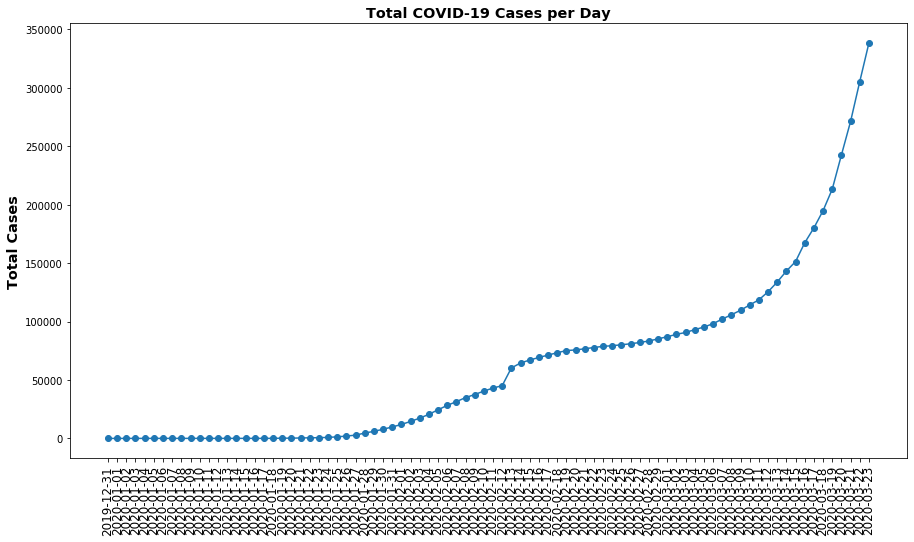

In [17]:
x_axis = world_total_and_death_and_new_cases_new_death_cases['date'].to_numpy()
y_axis = world_total_and_death_and_new_cases_new_death_cases['total_cases'].to_numpy()
plt.figure(figsize=(15,8))
plt.plot(x_axis, y_axis, marker='o')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='large')
plt.title('Total COVID-19 Cases per Day', fontweight='bold', fontsize='x-large')
plt.ylabel('Total Cases', fontweight='bold', fontsize='x-large')
plt.savefig('static/images/total-cases-covid-19.png')

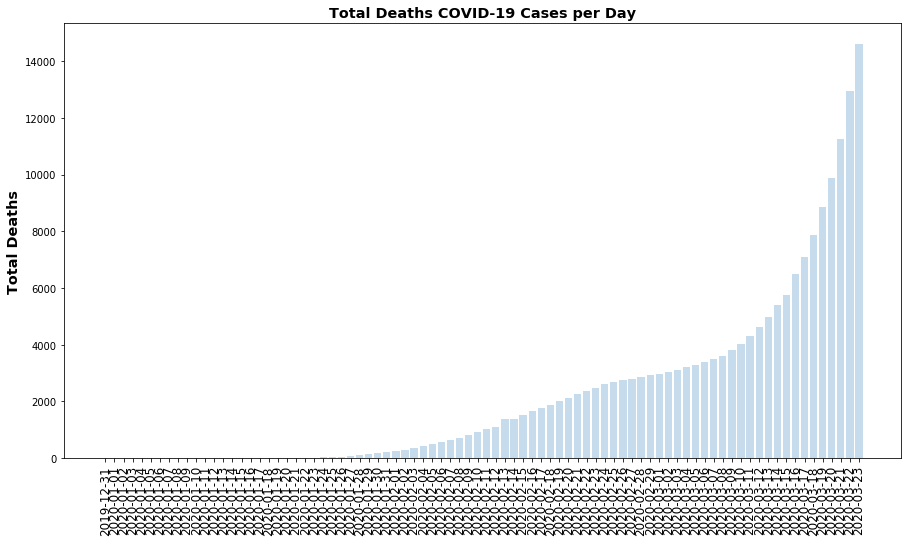

In [18]:
x_axis = world_total_and_death_and_new_cases_new_death_cases['date'].to_numpy()
y_axis = world_total_and_death_and_new_cases_new_death_cases['total_deaths'].to_numpy()
plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis, alpha= 0.25)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='large')
plt.title('Total Deaths COVID-19 Cases per Day', fontweight='bold', fontsize='x-large')
plt.ylabel('Total Deaths', fontweight='bold', fontsize='x-large')
plt.savefig('static/images/total-deaths-covid-19.png')

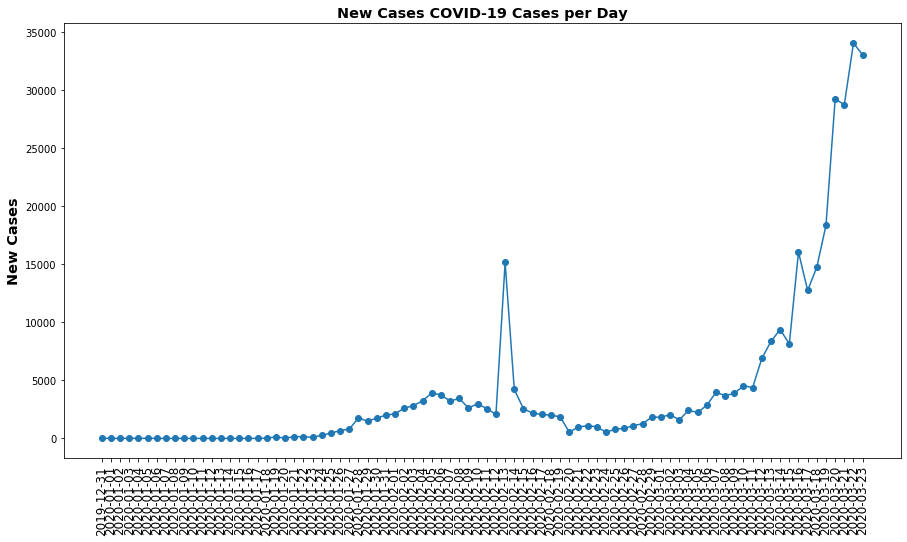

In [19]:
x_axis = world_total_and_death_and_new_cases_new_death_cases['date'].to_numpy()
y_axis = world_total_and_death_and_new_cases_new_death_cases['new_cases'].to_numpy()
plt.figure(figsize=(15,8))
plt.plot(x_axis, y_axis, marker='o')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='large')
plt.title('New Cases COVID-19 Cases per Day', fontweight='bold', fontsize='x-large')
plt.ylabel('New Cases', fontweight='bold', fontsize='x-large')
plt.savefig('static/images/new_cases-covid-19.png')

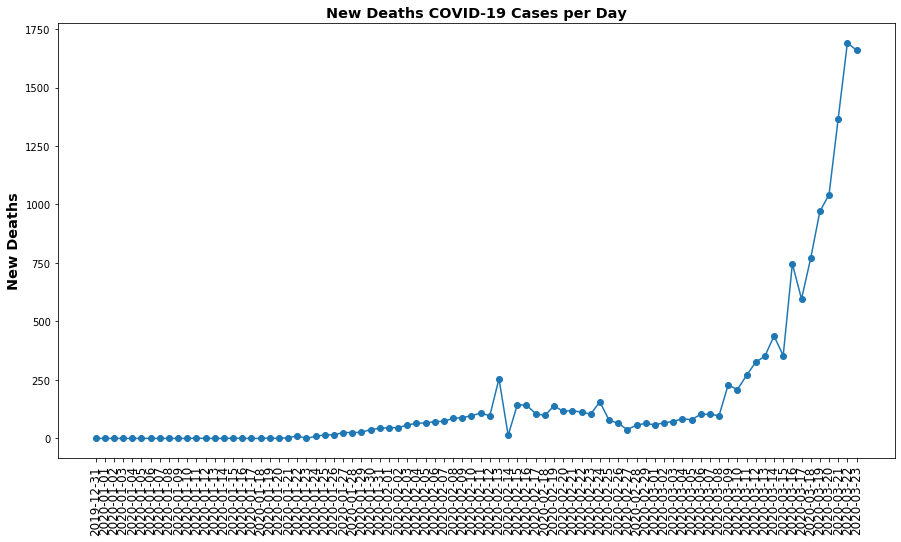

In [20]:
x_axis = world_total_and_death_and_new_cases_new_death_cases['date'].to_numpy()
y_axis = world_total_and_death_and_new_cases_new_death_cases['new_deaths'].to_numpy()
plt.figure(figsize=(15,8))
plt.plot(x_axis, y_axis, marker='o')
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='large')
plt.title('New Deaths COVID-19 Cases per Day', fontweight='bold', fontsize='x-large')
plt.ylabel('New Deaths', fontweight='bold', fontsize='x-large')
plt.savefig('static/images/new_deaths-covid-19.png')